In [1]:
import bokeh.io
import bokeh.plotting
from bokeh.io import output_file, show
from bokeh.layouts import column, row
from bokeh.plotting import figure
import sys
import glob 
import os 
import scipy.io as sio
import numpy as np
import decimal as dc
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
from bokeh.models import ColumnDataSource, Whisker

from natsort import natsorted, ns

from bokeh.models import Legend

from pathlib import Path

from scipy.stats import norm

# Enable viewing Bokeh plots in the notebook
bokeh.io.output_notebook()

Loading BokehJS ...

In [2]:
MiceToAnalyze = ['GF173','GF174','GF175','GF181',
                 'GF182','GF187','GF193','GF199',
                 'GF200','GF201','GF202','GF203',
                 'GF204','GF206','GF207','GF209']

In [3]:
#Read the behaviour pickle file for every mouse to analyse

serverPath = '\\\\sv1files.epfl.ch\\Petersen-Lab\\analysis\\Georgios_Foustoukos\\'

dataAll = np.zeros([len(MiceToAnalyze),6,4])
dprime = np.zeros([len(MiceToAnalyze),6])


for i, mouse in enumerate(MiceToAnalyze):
    
    print('Reading behaviour file for the mouse : ' + mouse + '...')
    
    dataPath = serverPath + mouse + "\\Behaviour\\" + mouse + '_Bhv.p' 
    
    with open(dataPath, 'rb') as fp:
        data = pickle.load(fp)
      
    dDays = np.zeros([len(data['dR'])]) 
    
    for d in range(len(data['dR'])):
        dDays[d] =np.nanmean(data['dR'][d])
    
    if len(data['AudHit']) == 6 :
        
        AudHit = np.reshape(np.array(data['AudHit']),[1,6])
        WhHit =  np.reshape(np.array(data['WhHit']), [1,6]) 
        FA = np.reshape(np.array(data['FA']),[1,6])
    
        dataAll[i,:,0] = AudHit
        dataAll[i,:,1] = WhHit
        dataAll[i,:,2] = FA
        dataAll[i,:,3] = dDays
        
    else:
        
        AudHit = np.reshape(np.array(data['AudHit']),[1,2])
        WhHit =  np.reshape(np.array(data['WhHit']), [1,2]) 
        FA = np.reshape(np.array(data['FA']),[1,2])
        dDays = np.reshape(dDays,[1,2])
        
        AudHitExt = np.concatenate((np.empty([1,3])*np.nan,AudHit,np.empty([1,1])*np.nan),axis =1)
        WhHitExt = np.concatenate((np.empty([1,3])*np.nan,WhHit,np.empty([1,1])*np.nan),axis =1) 
        FAExt = np.concatenate((np.empty([1,3])*np.nan,FA,np.empty([1,1])*np.nan),axis =1)
        dpExt = np.concatenate((np.empty([1,3])*np.nan,dDays,np.empty([1,1])*np.nan),axis =1)
        
        
        dataAll[i,:,0] = AudHitExt
        dataAll[i,:,1] = WhHitExt
        dataAll[i,:,2] = FAExt
        dataAll[i,:,3] = dpExt
    
    

Reading behaviour file for the mouse : GF173...
Reading behaviour file for the mouse : GF174...
Reading behaviour file for the mouse : GF175...
Reading behaviour file for the mouse : GF181...
Reading behaviour file for the mouse : GF182...
Reading behaviour file for the mouse : GF187...
Reading behaviour file for the mouse : GF193...
Reading behaviour file for the mouse : GF199...
Reading behaviour file for the mouse : GF200...
Reading behaviour file for the mouse : GF201...
Reading behaviour file for the mouse : GF202...
Reading behaviour file for the mouse : GF203...
Reading behaviour file for the mouse : GF204...
Reading behaviour file for the mouse : GF206...
Reading behaviour file for the mouse : GF207...
Reading behaviour file for the mouse : GF209...


In [5]:
dDays.shape

(2,)

In [127]:
with open(dataPath, 'rb') as fp:
    data = pickle.load(fp)

In [137]:
d = np.array(data['dR'])

dDays = np.zeros([len(data['dR'])]) 

dDays.shape

(2,)

In [144]:
for d in range(len(data['dR'])):
    dDays[d] =np.nanmean(data['dR'][d])

In [145]:
dDays

array([2.26900387, 2.08847163])

In [7]:
dataAll[:,:,3].shape

(14, 6)

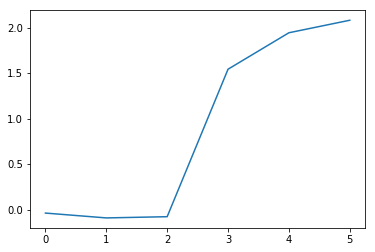

In [10]:
plt.plot(np.nanmean(dataAll[:,:,3],axis=0))

In [4]:
errorAudH = np.nanstd(dataAll[:,:,0],axis = 0)/np.sqrt(np.sum(np.invert(np.isnan(dataAll[:,:,0])),axis = 0))
errorWhH = np.nanstd(dataAll[:,:,1],axis = 0)/np.sqrt(np.sum(np.invert(np.isnan(dataAll[:,:,1])),axis = 0))
errorFA = np.nanstd(dataAll[:,:,2],axis = 0)/np.sqrt(np.sum(np.invert(np.isnan(dataAll[:,:,2])),axis = 0))


MeanAudH = np.nanmean(dataAll[:,:,0],axis=0)
MeanWhH = np.nanmean(dataAll[:,:,1],axis=0)
MeanFA = np.nanmean(dataAll[:,:,2],axis=0)

Days = dataAll.shape[1] + 1

p = bokeh.plotting.figure(
    width=900,
    height=500,
    x_axis_label='Days of training',
    y_axis_label='AudHit/WhHit/FA',
    title= 'Mean Behaviour (n=15)' 
    )

p.yaxis.axis_label_text_font_style = "bold"
p.xaxis.axis_label_text_font_style = "bold"
p.title.align = 'center'


audh = p.line(
x= range(1,Days,1),
y= MeanAudH ,
line_join='bevel',
line_width=2,
color = 'blue',
)


err_xs = []
err_ys = []

for x, y, yerr in zip(range(1,Days,1), MeanAudH, errorAudH ):
    err_xs.append((x, x))
    err_ys.append((y - yerr, y + yerr))

# plot them
p.multi_line(err_xs, err_ys, color='blue')



err_xs = []
err_ys = []

for x, y, yerr in zip(range(1,Days,1), MeanWhH, errorWhH ):
    err_xs.append((x, x))
    err_ys.append((y - yerr, y + yerr))

# plot them
p.multi_line(err_xs, err_ys, color='black')


err_xs = []
err_ys = []

for x, y, yerr in zip(range(1,Days,1), MeanFA, errorFA ):
    err_xs.append((x, x))
    err_ys.append((y - yerr, y + yerr))

# plot them
p.multi_line(err_xs, err_ys, color='red')


p.circle(range(1,Days,1), MeanAudH , color='blue', size=5, line_alpha=0)

fa = p.line(
x= range(1,Days,1),
y= MeanFA,
line_join='bevel',
line_width=2,
color = 'red',
)

p.circle(range(1,Days,1), MeanFA , color='red', size=5, line_alpha=0)

whhit = p.line(
x= range(1,Days,1),
y= MeanWhH,
line_join='bevel',
line_width=2,
color = 'black',
)

p.circle(range(1,Days,1), MeanWhH , color='black', size=5, line_alpha=0)

legend = Legend(items=[
("AudHit" , [audh]),
("WhHit" , [whhit]),
("FA" , [fa])   
], location="center")

p.add_layout(legend, 'right')

p.legend.click_policy="hide"

bokeh.io.show(p) 

errorDprime = np.nanstd(dataAll[:,:,3],axis = 0)/np.sqrt(np.sum(np.invert(np.isnan(dataAll[:,:,3])),axis = 0))
MeanDprime = np.nanmean(dataAll[:,:,3],axis=0)

k = bokeh.plotting.figure(
    width=900,
    height=500,
    x_axis_label='Days of training',
    y_axis_label='dprime for W',
    title= 'Mean dprime (n=15)' 
    )

k.yaxis.axis_label_text_font_style = "bold"
k.xaxis.axis_label_text_font_style = "bold"
k.title.align = 'center'

dprime = k.line(
x= range(1,Days,1),
y= MeanDprime ,
line_join='bevel',
line_width=2,
color = 'green',
)


err_xs = []
err_ys = []

for x, y, yerr in zip(range(1,Days,1), MeanDprime, errorDprime):
    err_xs.append((x, x))
    err_ys.append((y - yerr, y + yerr))

# plot them
k.multi_line(err_xs, err_ys, color='green')
bokeh.io.show(k) 


In [113]:
dataAll[dataAll[:,:,1] ==0]

array([[0.89772727, 0.        , 0.14285714],
       [0.75      , 0.        , 0.10447761],
       [0.692607  , 0.        , 0.07421875],
       [0.68548387, 0.        , 0.05263158],
       [0.88405797, 0.        , 0.14285714],
       [0.87804878, 0.        , 0.08433735],
       [0.83571429, 0.        , 0.23571429],
       [0.82758621, 0.        , 0.18103448],
       [0.79807692, 0.        , 0.20192308],
       [0.87313433, 0.        , 0.17164179],
       [0.8452381 , 0.        , 0.1       ],
       [0.72826087, 0.        , 0.2173913 ],
       [0.60416667, 0.        , 0.11805556]])

In [5]:
p = bokeh.plotting.figure(
    width=400,
    height=500,
    x_axis_label='Days',
    y_axis_label='WhHit',
    title= 'Individual Mouse Whisker Hit' 
    )

p.yaxis.axis_label_text_font_style = "bold"
p.xaxis.axis_label_text_font_style = "bold"
p.title.align = 'center'

p.circle(1, dataAll[:,3,1] ,line_color='black',line_width =1.5, fill_color = 'white',size=5,)
p.circle(1, np.mean(dataAll[:,3,1]) ,line_color='black',line_width =1.5, fill_color = 'black',size=5,)

p.circle(2, dataAll[:,4,1] ,line_color='black',line_width =1.5, fill_color = 'white',size=5,)
p.circle(2, np.mean(dataAll[:,4,1]) ,line_color='black',line_width =1.5, fill_color = 'black',size=5,)

for i in range(dataAll[:,3,1].shape[0]):
    
    p.line(
    x= np.array([1 ,2]),
    y= np.array([dataAll[i,3,1],dataAll[i,4,1]]),
    line_join='bevel',
    line_width=0.5,
    color = 'gray',
    )

p.line(
x= np.array([1 ,2]),
y= np.array([np.mean(dataAll[:,3,1],axis =0),np.mean(dataAll[:,4,1],axis =0)]),
line_join='bevel',line_width=1,
color = 'black',
    )


p.xaxis.ticker = [1, 1.2, 1.4, 1.6, 1.8, 2]
p.xaxis.major_label_overrides = {1: 'SWD', 1.2 : '', 1.4 : '', 1.6 : '', 1.8 : '' , 2: 'SWD+1'}

bokeh.io.show(p)    


k = bokeh.plotting.figure(
    width=400,
    height=500,
    x_axis_label='Switching Day',
    y_axis_label='dprime for W',
    title= 'Individual Mouse dprime for W' 
    )

k.yaxis.axis_label_text_font_style = "bold"
k.xaxis.axis_label_text_font_style = "bold"
k.title.align = 'center'

k.circle(1, dataAll[:,3,3] ,line_color='green',line_width =1.5, fill_color = 'white',size=5,)
k.circle(1, np.mean(dataAll[:,3,3]) ,line_color='green',line_width =1.5, fill_color = 'green',size=5,)
k.circle(2, dataAll[:,4,3] ,line_color='green',line_width =1.5, fill_color = 'white',size=5,)
k.circle(2, np.mean(dataAll[:,4,3]) ,line_color='green',line_width =1.5, fill_color = 'green',size=5,)


for i in range(dataAll[:,3,3].shape[0]):
    
    k.line(
    x= np.array([1 ,2]),
    y= np.array([dataAll[i,3,3],dataAll[i,4,3]]),
    line_join='bevel',
    line_width=0.5,
    color = 'green',
    )
    
k.line(
x= np.array([1 ,2]),
y= np.array([np.mean(dataAll[:,3,3],axis =0),np.mean(dataAll[:,4,3],axis =0)]),
line_join='bevel',line_width=2,
color = 'green',
    )

k.xaxis.ticker = [1, 1.2, 1.4, 1.6, 1.8, 2]
k.xaxis.major_label_overrides = {1: 'SWD', 1.2 : '', 1.4 : '', 1.6 : '', 1.8 : '' , 2: 'SWD+1'}

bokeh.io.show(k)  

In [8]:
dataAll[:,3,1].shape[0]

14

In [118]:
dprime = d

array([0.78461538, 0.42136499, 0.45806452, 0.78888889, 0.38      ,
       0.37606838, 0.85496183, 0.40707965, 0.79411765, 0.72380952,
       0.59027778, 0.72826087, 0.15555556, 0.77922078])